<center><img src="https://universodiscreto.com/circle-ud.png"/></center>

# 1. Teoria

A ideia desse tipo de filtro é destacar regiões de contraste, como é o caso da foto abaixo, em que as áreas da imagem com transição de cor ficam brilhantes; caso contrário, a região fica escura.

A mesma operação de convolução feita no primeiro vídeo de filtros é aplicada aqui, com a diferença de que os coeficientes do operador de convolução são distintos, de acordo com o filtro de alta frequência usado.

https://www.pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/

## 1.1 Imports

In [1]:
import numpy as np
import cv2

## 1.2 Funções para exibir imagem em grid

In [2]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor=0, maxcolor=255):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

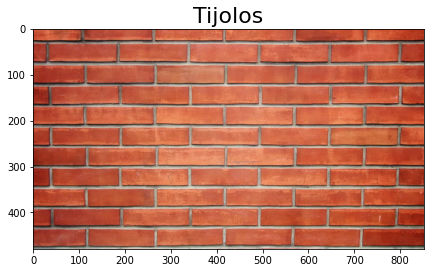

In [3]:
img_tij = cv2.imread("tijolos.jpg")
img_tij = cv2.cvtColor(img_tij, cv2.COLOR_BGR2RGB)
showSingleImage(img_tij, "Tijolos", (7, 7))

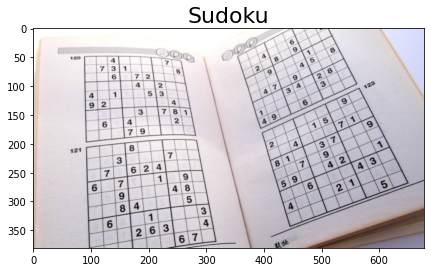

In [4]:
img_sudoku = cv2.imread("sudoku.jpg")
img_sudoku = cv2.cvtColor(img_sudoku, cv2.COLOR_BGR2RGB)
showSingleImage(img_sudoku, "Sudoku", (7, 7))

## 1.3 Filtragem Passa-Alta

### 1.3.1 Filtro Sobel

Sobel operators is a joint Gaussian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize.

https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html

The sobel is one of the most commonly used edge detectors. It is based on convolving the image with a small, separable, and integer valued filter in horizontal and vertical direction and is therefore relatively inexpensive in terms of computations. The Sobel edge enhancement filter has the advantage of providing differentiating (which gives the edge response) and smoothing (which reduces noise) concurrently.

https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e

quanto maior a kernel -> melhor detecção e menor sensibilidade a ruído, porém menos localizado (preciso)

https://www.youtube.com/watch?v=lOEBsQodtEQ

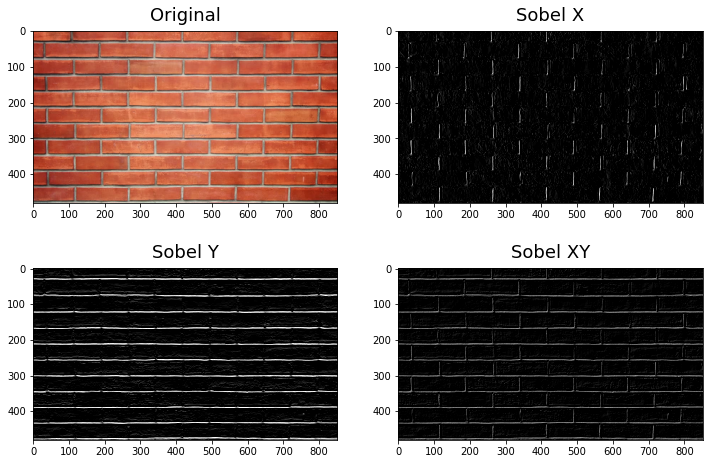

In [12]:
img_gray = cv2.cvtColor(img_tij, cv2.COLOR_RGB2GRAY)

img_sobelx = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
img_sobely = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
#img_sobelxy = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) #assim fica fraco
img_sobelxy = cv2.addWeighted(img_sobelx, 0.5, img_sobely, 0.5, 0) #melhor usar assim

imgsArray = [img_tij, img_sobelx, img_sobely, img_sobelxy]
titlesArray = ['Original', 'Sobel X', 'Sobel Y', 'Sobel XY']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 2)

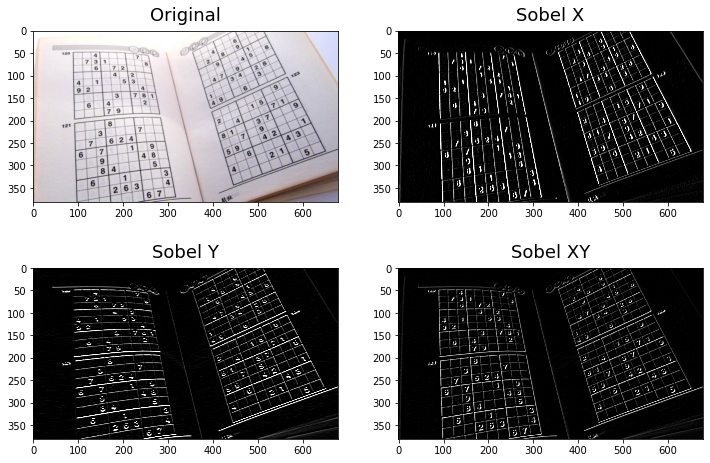

In [103]:
img_gray = cv2.cvtColor(img_sudoku, cv2.COLOR_RGB2GRAY)

img_sobelx = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
img_sobely = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
#img_sobelxy = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)
img_sobelxy = cv2.addWeighted(img_sobelx, 0.5, img_sobely, 0.5, 0) #melhor usar assim

imgsArray = [img_sudoku, img_sobelx, img_sobely, img_sobelxy]
titlesArray = ['Original', 'Sobel X', 'Sobel Y', 'Sobel XY']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 2)

### CUIDADO ao operar com as imagens após a aplicação do filtro

Devemos "transformar" as imagens para inteiro sem sinal 8 bits com a função cv2.convertScaleAbs

In [76]:
print(img_sobelx)

[[  0.   0.   0. ...  -2.   0.   0.]
 [  0.   0.   0. ...  -3.   0.   0.]
 [  0.   0.   0. ...  -4.  -1.   0.]
 ...
 [  0. -26.  36. ... -11.   8.   0.]
 [  0. -26.  36. ... -10.   7.   0.]
 [  0. -26.  36. ...  -8.   8.   0.]]


In [77]:
img_sobelx = cv2.convertScaleAbs(img_sobelx)

print(img_sobelx)

[[ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  4  1  0]
 ...
 [ 0 26 36 ... 11  8  0]
 [ 0 26 36 ... 10  7  0]
 [ 0 26 36 ...  8  8  0]]


### 1.3.2 Filtro Scharr

The Sobel operator (cv2.Sobel) can reduce such artifacts, but it is not rotationally
symmetric. The Scharr operator (cv2.Scharr) was targeted at correcting this but only
looks at the first image derivative

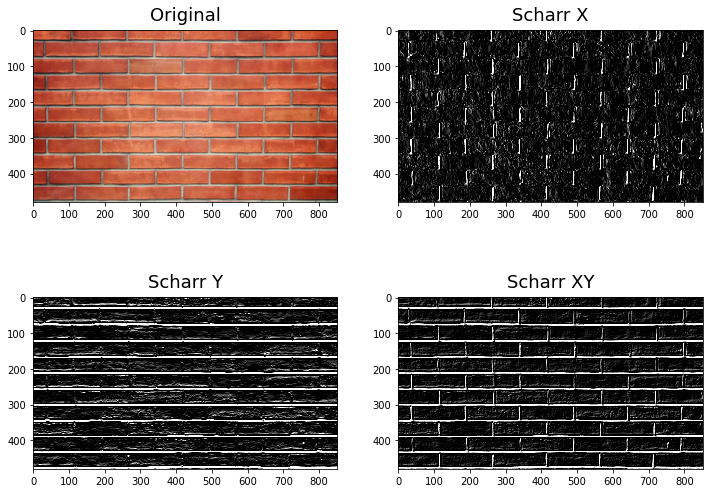

In [93]:
img_gray = cv2.cvtColor(img_tij, cv2.COLOR_RGB2GRAY)

img_scharrx = cv2.Scharr(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=0)
img_scharry = cv2.Scharr(src=img_gray, ddepth=cv2.CV_64F, dx=0, dy=1)
img_scharrxy = cv2.addWeighted(img_scharrx, 0.5, img_scharry, 0.5, 0) #melhor usar assim

imgsArray = [img_tij, img_scharrx, img_scharry, img_scharrxy]
titlesArray = ['Original', 'Scharr X', 'Scharr Y', 'Scharr XY']
showMultipleImages(imgsArray, titlesArray, (12, 9), 2, 2)

### Com Gaussian Blur, remove ruído!

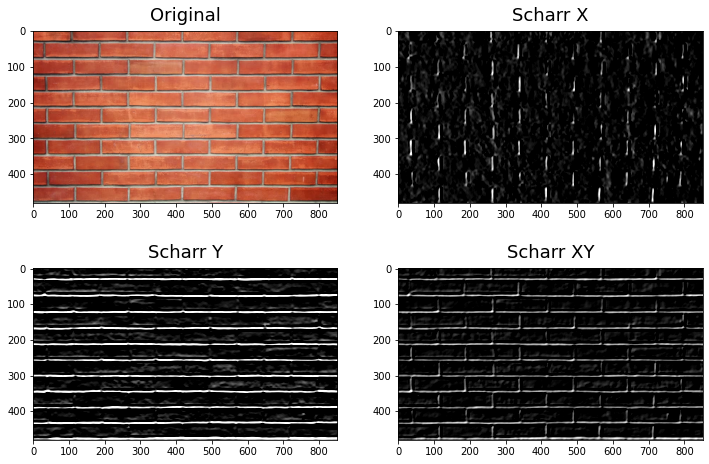

In [6]:
img_gray = cv2.cvtColor(img_tij, cv2.COLOR_RGB2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (9, 9), 3, 3)

img_scharrx = cv2.Scharr(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0)
img_scharry = cv2.Scharr(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1)
img_scharrxy = cv2.addWeighted(img_scharrx, 0.5, img_scharry, 0.5, 0) #melhor usar assim

imgsArray = [img_tij, img_scharrx, img_scharry, img_scharrxy]
titlesArray = ['Original', 'Scharr X', 'Scharr Y', 'Scharr XY']
showMultipleImages(imgsArray, titlesArray, (12, 8), 2, 2)

### 1.3.3 Filtro Laplaciano

* https://aishack.in/tutorials/sobel-laplacian-edge-detectors/
* https://theailearner.com/tag/cv2-laplacian/
* https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.402.1860&rep=rep1&type=pdf

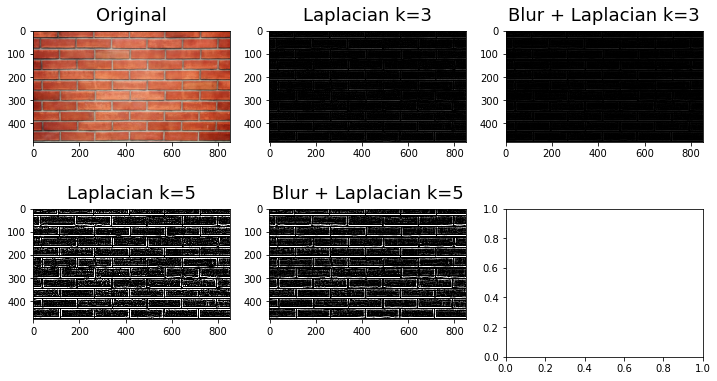

In [30]:
img_gray = cv2.cvtColor(img_tij, cv2.COLOR_RGB2GRAY)
img_laplacian3 = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=3)

img_blur = cv2.GaussianBlur(img_gray, (5, 5), 5, 5)
img_blur_laplacian3 = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=3)

img_laplacian5 = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=5)

img_blur = cv2.GaussianBlur(img_gray, (5, 5), 5, 5)
img_blur_laplacian5 = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=5)

imgsArray = [img_tij, img_laplacian3, img_blur_laplacian3, img_laplacian5, img_blur_laplacian5]
titlesArray = ['Original', 'Laplacian k=3', 'Blur + Laplacian k=3', 'Laplacian k=5', 'Blur + Laplacian k=5']
showMultipleImages(imgsArray, titlesArray, (12, 6), 3, 2)

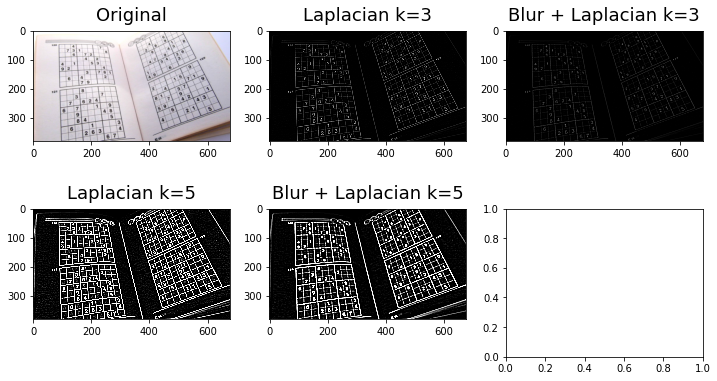

In [5]:
img_gray = cv2.cvtColor(img_sudoku, cv2.COLOR_RGB2GRAY)
img_laplacian3 = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=3)

img_blur = cv2.GaussianBlur(img_gray, (5, 5), 5, 5)
img_blur_laplacian3 = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=3)

img_laplacian5 = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=5)

img_blur = cv2.GaussianBlur(img_gray, (5, 5), 5, 5)
img_blur_laplacian5 = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=5)

imgsArray = [img_sudoku, img_laplacian3, img_blur_laplacian3, img_laplacian5, img_blur_laplacian5]
titlesArray = ['Original', 'Laplacian k=3', 'Blur + Laplacian k=3', 'Laplacian k=5', 'Blur + Laplacian k=5']
showMultipleImages(imgsArray, titlesArray, (12, 6), 3, 2)

## 1.4 Canny Edge

* https://www.youtube.com/watch?v=sRFM5IEqR2w
* https://www.youtube.com/watch?v=hUC1uoigH6s
* https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
* https://www.pyimagesearch.com/2021/05/12/opencv-edge-detection-cv2-canny/

In [16]:
import time

ESCAPE_KEY_ASCII = 27

def onChange(value):
    pass

#imagem carregada e sua cópia
img = cv2.cvtColor(img_sudoku, cv2.COLOR_RGB2GRAY)
img = cv2.GaussianBlur(img, (3, 3), 3, 3)
copyimg = img.copy()

#cria janela gráfica para inserir a imagem
windowTitle = "Canny Edge Detector"
cv2.namedWindow(windowTitle)

#cria trackbar
cv2.createTrackbar("limiar_min", windowTitle, 0, 300, onChange)
cv2.createTrackbar("limiar_max", windowTitle, 0, 300, onChange)

before_min_thresh = 0
update_min_thresh = False
before_max_thresh = 0
update_max_thresh = False
counter_time = 0

while True:
    current_min_thresh = cv2.getTrackbarPos("limiar_min", windowTitle)
    
    #valor de limiar do trackbar foi alterado pelo usuário? (sim)
    if before_min_thresh != current_min_thresh:
        update_min_thresh = True
        counter_time = time.time()
        before_min_thresh = current_min_thresh
        
    #se tiver passado 1 segundo desde que o usuário mexeu em algum trackbar
    if time.time() - counter_time > 1:
        #se tiver sido marcado que é pra atualizar o filtro canny
        if update_min_thresh == True:
            
            #fazemos uma cópia da imagem original
            copyimg = cv2.Canny(img, current_min_thresh, current_max_thresh)
            update_min_thresh = False
            
    current_max_thresh = cv2.getTrackbarPos("limiar_max", windowTitle)
    
    #valor de limiar do trackbar foi alterado pelo usuário? (sim)
    if before_max_thresh != current_max_thresh:
        update_max_thresh = True
        counter_time = time.time()
        before_max_thresh = current_max_thresh
        
    #se tiver passado 1 segundo desde que o usuário mexeu em algum trackbar
    if time.time() - counter_time > 1:
        #se tiver sido marcado que é pra atualizar o filtro canny
        if update_max_thresh == True:
            
            #fazemos uma cópia da imagem original
            copyimg = cv2.Canny(img, current_min_thresh, current_max_thresh)
            update_max_thresh = False
        
    cv2.imshow(windowTitle, copyimg)
    
    keyPressed = cv2.waitKey(1) & 0xFF
    if keyPressed == ESCAPE_KEY_ASCII:
        break
        
cv2.destroyAllWindows()

# Referências

* https://www.youtube.com/watch?v=uihBwtPIBxM
* https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html
* https://www.youtube.com/watch?v=uihBwtPIBxM
* https://learnopencv.com/edge-detection-using-opencv/